# I. Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd   
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# II. Đọc Data vào Dataframe. Data được thu thập thủ công từ trang https://www.worldometers.info/coronavirus/ vào ngày 04/05/2022

In [2]:
Data = pd.read_csv('Raw_data.csv',sep=';')

In [3]:
Data

,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/1M pop,Population
0,NaN,World,"513,697,783","154,755","6,262,191",623.0,"467,939,862","337,659","39,495,730","40,904","65,903",803.4,NaN,NaN,NaN
1,1.0,USA,"83,356,490","71,798","1,023,513",305.0,"80,836,418","38,675","1,496,559","1,655","249,149","3,059","1,008,201,262","3,013,472","334,564,690"
2,2.0,India,"43,091,299","2,898","523,92",NaN,"42,544,689",NaN,"22,69",698,"30,672",373,"838,628,250","596,93","1,404,902,630"
3,3.0,Brazil,"30,502,501","20,072","663,816",51.0,"29,602,372","17,068","236,313","8,318","141,653","3,083","63,776,166","296,176","215,332,283"
4,4.0,France,"28,805,690","47,925","146,376",114.0,"27,301,135","137,222","1,358,179","1,511","439,523","2,233","269,816,888","4,116,918","65,538,567"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224.0,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
225,225.0,Niue,9,NaN,NaN,NaN,8,1,1,NaN,"5,468",NaN,NaN,NaN,"1,646"
226,226.0,Micronesia,7,NaN,NaN,NaN,1,NaN,6,NaN,60,NaN,NaN,NaN,"117,236"
227,227.0,Nauru,5,NaN,NaN,NaN,3,NaN,2,NaN,457,NaN,NaN,NaN,"10,949"


# III. Tiền xử lí dữ liệu

Thay những dòng có giá trị NAN bằng 0, xóa một số cột không cần thiết và chuyển các số liệu về dạng có thể tính toán

In [4]:
def data_preprocessing(Data):
    for col_name in Data:
        temp = []     
        for col in Data[col_name]:
            col = str(col)
            col = col.replace(',','')
            try:   
                col = int(col)
            except:
                pass
            temp.append(col)
        Data[col_name] = temp
    return Data

In [5]:
Data = Data.fillna(0)
Data = data_preprocessing(Data) 
Data.drop("#", axis=1, inplace=True)
#Data = Data.drop([0])
Data = Data.dropna()
Data.to_csv('Preprocess_Data.csv')

In [6]:
Data

,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/1M pop,Population
0,World,513697783,154755,6262191,623.0,467939862,337659,39495730,40904,65903,803.4,0,0,0
1,USA,83356490,71798,1023513,305.0,80836418,38675,1496559,1655,249149,3059,1008201262,3013472,334564690
2,India,43091299,2898,52392,0.0,42544689,0,2269,698,30672,373,838628250,59693,1404902630
3,Brazil,30502501,20072,663816,51.0,29602372,17068,236313,8318,141653,3083,63776166,296176,215332283
4,France,28805690,47925,146376,114.0,27301135,137222,1358179,1511,439523,2233,269816888,4116918,65538567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,MS Zaandam,9,0,2,0.0,7,0,0,0,0,0,0,0,0
225,Niue,9,0,0,0.0,8,1,1,0,5468,0,0,0,1646
226,Micronesia,7,0,0,0.0,1,0,6,0,60,0,0,0,117236
227,Nauru,5,0,0,0.0,3,0,2,0,457,0,0,0,10949


# IV. Chạy một số thuật toán học máy đơn giản

## Thuật toán giảm chiều Principal Component Analysis (PCA)

Vừa được học ở môn Phân tích dữ liệu thông minh, nguồn tham khảo https://drive.google.com/drive/folders/19aSO_xYvoj4DllCaRjrpBs8Ct97F-I9O

In [7]:
#load dataset into Pandas Dataframe
data_df = Data.drop(columns=['Country, Other']) #remove non-numeric columns

#standardizing the features
x = StandardScaler().fit_transform(data_df.values)

#reduce data to 2 components by PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(f'Reduce data from {x.shape} into {principalComponents.shape}')

Reduce data from (229, 13) into (229, 2)


In [8]:
#print(principalComponents.shape)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal components 1', 'principal components 2'])

#add 'Country, Other' to new dataset
final_df = pd.concat([principal_df, Data['Country, Other']], axis=1)
final_df = final_df.drop([0]) #remove World
final_df

,principal components 1,principal components 2,"Country, Other"
1,7.853430,5.115315,USA
2,1.676270,1.939892,India
3,3.097769,0.525871,Brazil
4,4.814459,3.082411,France
5,2.658876,1.424593,Germany
...,...,...,...
224,-0.450336,-1.329202,MS Zaandam
225,-0.450081,-1.307548,Niue
226,-0.450309,-1.328929,Micronesia
227,-0.450315,-1.327389,Nauru


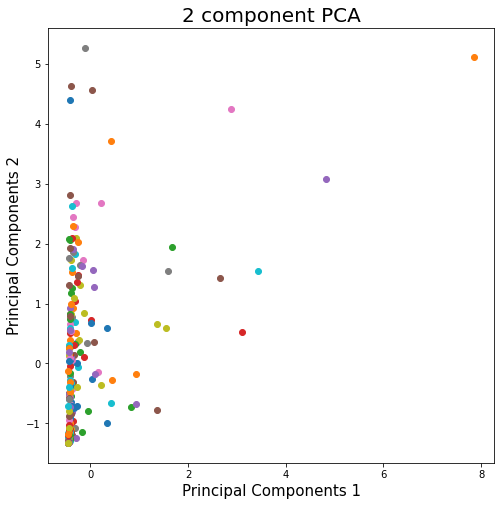

In [9]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Components 1', fontsize = 15)
ax.set_ylabel('Principal Components 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for i in Data['Country, Other']:
    pca_indicesToKeep = final_df['Country, Other'] == i
    ax.scatter(final_df.loc[pca_indicesToKeep, 'principal components 1']
               , final_df.loc[pca_indicesToKeep, 'principal components 2'])
ax.plot();

## Bình phương nhỏ nhất thông thường Ordinary Least Squares (OLS)

Vừa được học ở môn Trực quan hóa dữ liệu

In [13]:
data_df_OLS = Data.drop(columns=['Country, Other'])
data_df_OLS = data_df_OLS.drop([0]) #remove World
X = sm.add_constant(data_df_OLS['Total Cases'])
mod = sm.OLS(data_df_OLS['Total Recovered'], X).fit()
res = mod.summary()
print(res)

                            OLS Regression Results                            
Dep. Variable:        Total Recovered   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     7615.
Date:                Sat, 28 May 2022   Prob (F-statistic):          4.79e-176
Time:                        21:25:05   Log-Likelihood:                -3517.8
No. Observations:                 228   AIC:                             7040.
Df Residuals:                     226   BIC:                             7046.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.138e+05   8.43e+04     -1.350      

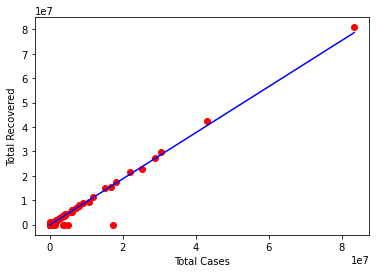

In [24]:
plt.scatter(data_df_OLS['Total Cases'], data_df_OLS['Total Recovered'], color='red')
Y = 0.9446 *data_df_OLS['Total Cases'] + -1.138e+05 
plt.plot(data_df_OLS['Total Cases'], Y, color='blue')
plt.xlabel('Total Cases')
plt.ylabel('Total Recovered')
plt.show();